# Decision Tree Test for Rice Dataset

#### Importing the Dependencies

In [17]:
import numpy as np
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from io import StringIO
from IPython.display import Image

#### Load the dataset and Display first few rows of the dataset

In [18]:
df = pd.read_csv('data/Rice_Data.csv')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


**The Rice dataset contains 3800 instances and 8 features.**

In [19]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


#### Check for missing values in the dataset

In [20]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

**This means that there are no missing data since the count is complete for all features.**

#### Print the distribution of the target variable

In [21]:
print(df.Class.value_counts())

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


#### Correlation matrix for the features

#### Split the features (X) and target (y) variables

In [22]:
X = df.drop('Class', axis = 1)
y = df['Class']
X.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024


In [23]:
X.corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


#### Scatter matrix to visualize correlations between features

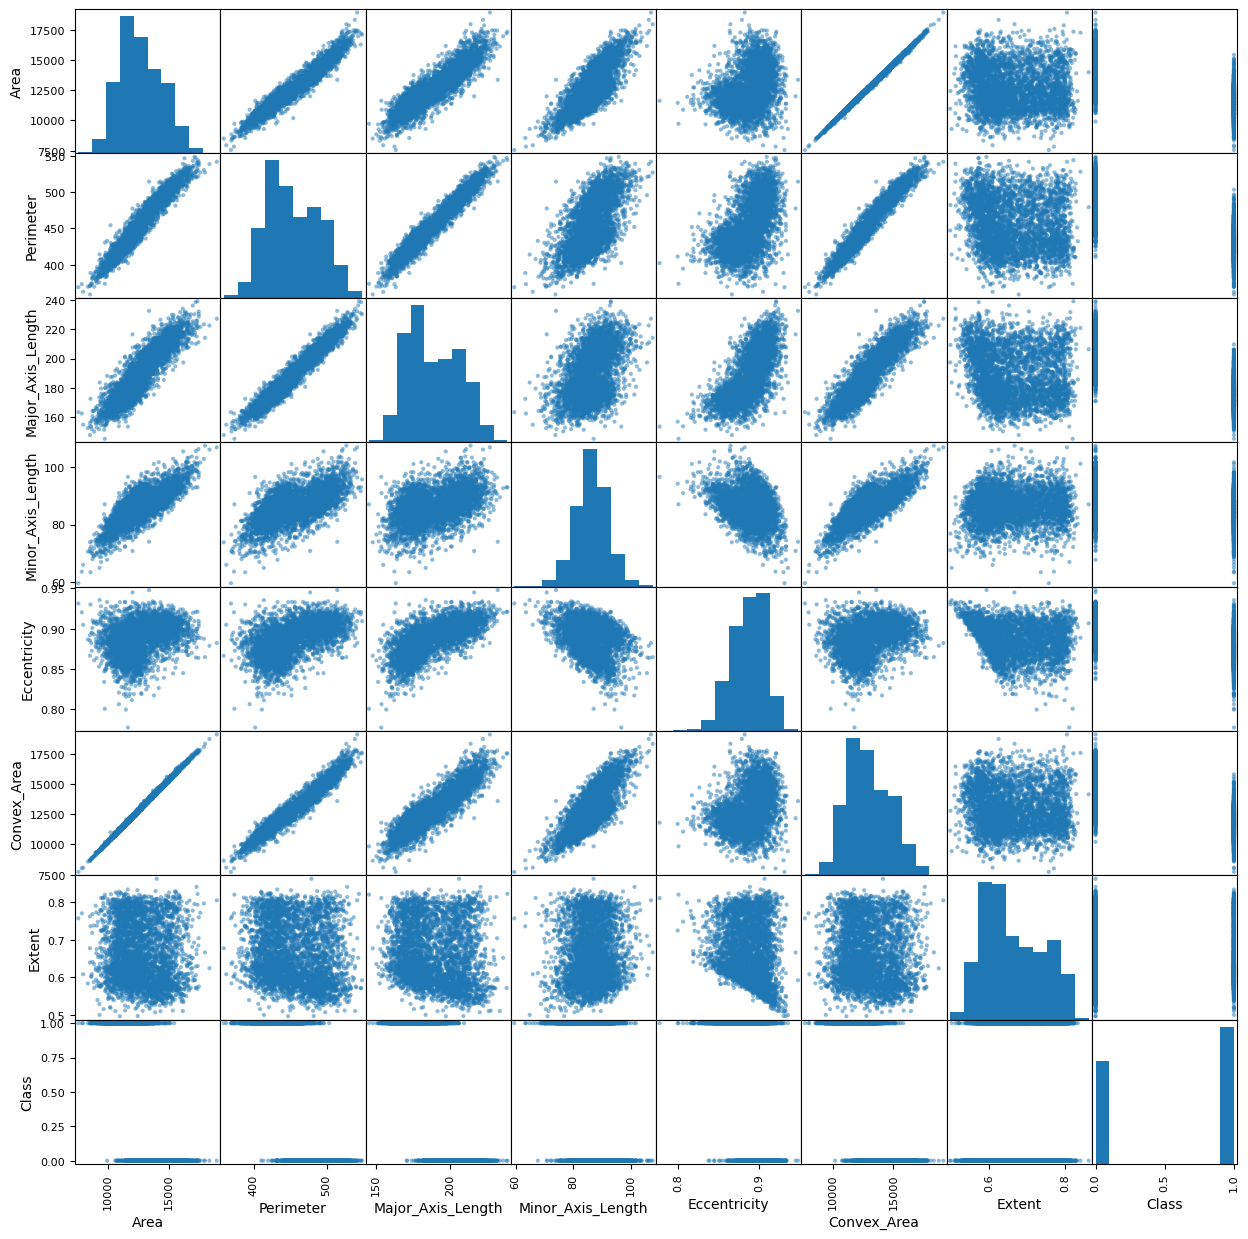

In [24]:
df2 = df.copy()
le = LabelEncoder()
df2.Class = le.fit_transform(df2.Class)
scatter_matrix(df2, figsize=(15, 15))
plt.savefig('plots/scatter_plot_rice.png')

**From the above scatter matrix, we can see features referring to Area, Perimeter and Convex_Area shows linear relationship and it is hard to do separation.**

#### Visualize the relationship between Area and Minor_Axis_Length

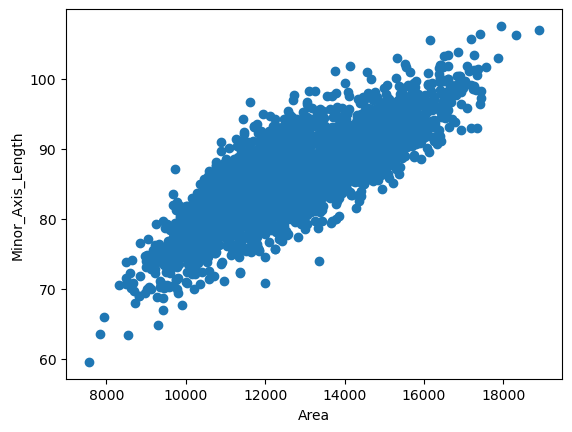

In [25]:
plt.scatter(df.Area, df.Minor_Axis_Length)
plt.xlabel("Area")
plt.ylabel("Minor_Axis_Length")
plt.show()

#### Visualize the distribution of two classes (Osmancik and Cammeo) based on certain features

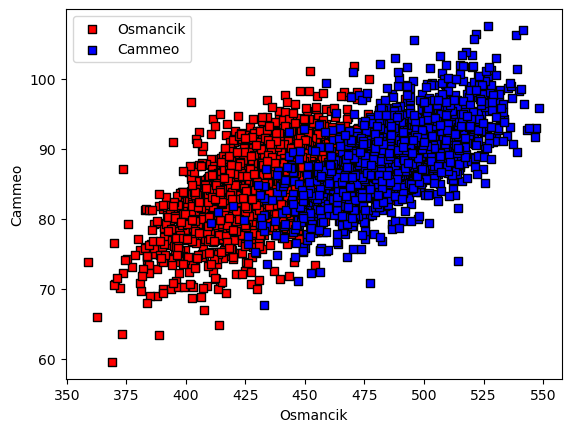

In [34]:
d = df.to_numpy()

plt.scatter(
    d[d[:,7] == "Osmancik", 1], d[d[:,7] == "Osmancik", 3],
    c='red', marker='s', edgecolor='black',
    label='Osmancik'
)


plt.scatter(
    d[d[:,7] == "Cammeo", 1], d[d[:,7] == "Cammeo", 3],
    c='blue', marker='s', edgecolor='black',
    label='Cammeo'
)

plt.xlabel('Osmancik')
plt.ylabel('Cammeo')
plt.legend(loc="upper left")

plt.show()

# Model Building

#### Split data into training and testing sets (70% training, 30% testing)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2667, 7)
(2667,)
(1143, 7)
(1143,)


#### Perform cross-validation to determine the best tree depth

In [28]:
for d in range(2,20) :
    model = DecisionTreeClassifier(max_depth=d,random_state = 42)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("d: ", d, " val accuracy: ", scores.mean())

d:  2  val accuracy:  0.9257625903830344
d:  3  val accuracy:  0.9253873558614585
d:  4  val accuracy:  0.9171328990731566
d:  5  val accuracy:  0.9141324282732889
d:  6  val accuracy:  0.9126300848142449
d:  7  val accuracy:  0.903639915396561
d:  8  val accuracy:  0.9017602293568313
d:  9  val accuracy:  0.8980099922001813
d:  10  val accuracy:  0.8905158420642115
d:  11  val accuracy:  0.8916366268243495
d:  12  val accuracy:  0.8912606896164036
d:  13  val accuracy:  0.8878870923540696
d:  14  val accuracy:  0.8848887296133118
d:  15  val accuracy:  0.8837651341076936
d:  16  val accuracy:  0.8856427120883137
d:  17  val accuracy:  0.8803915368453599
d:  18  val accuracy:  0.8826422412884458
d:  19  val accuracy:  0.8803915368453599


#### Create and train the Decision Tree model with a specified depth

#### Calculated the training and test accuracy

In [29]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train) 

print("Tree Depth:", model.get_depth())
print("Training Accuracy: ", model.score(X_train, y_train))
print("Test Accuracy: ", model.score(X_test, y_test))

Tree Depth: 4
Training Accuracy:  0.9347581552305961
Test Accuracy:  0.9221347331583553


**The model without cross-validation (fixed depth of 4) shows good performance with a high training accuracy (93.48%) and a strong test accuracy (92.21%).**

**The maximum depth is 4 and it is primarily used to prevent underfitting.**

#### Predict the response for the test dataset

In [30]:
y_hat = model.predict(X_test)

#### Generate confusion matrix to evaluate model performance

In [31]:
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("TN", tn, "FP", fp, "FN", fn, "TP", tp)

CM [[451  60]
 [ 29 603]]

TN 451 FP 60 FN 29 TP 603


#### Prepare to visualize the decision tree

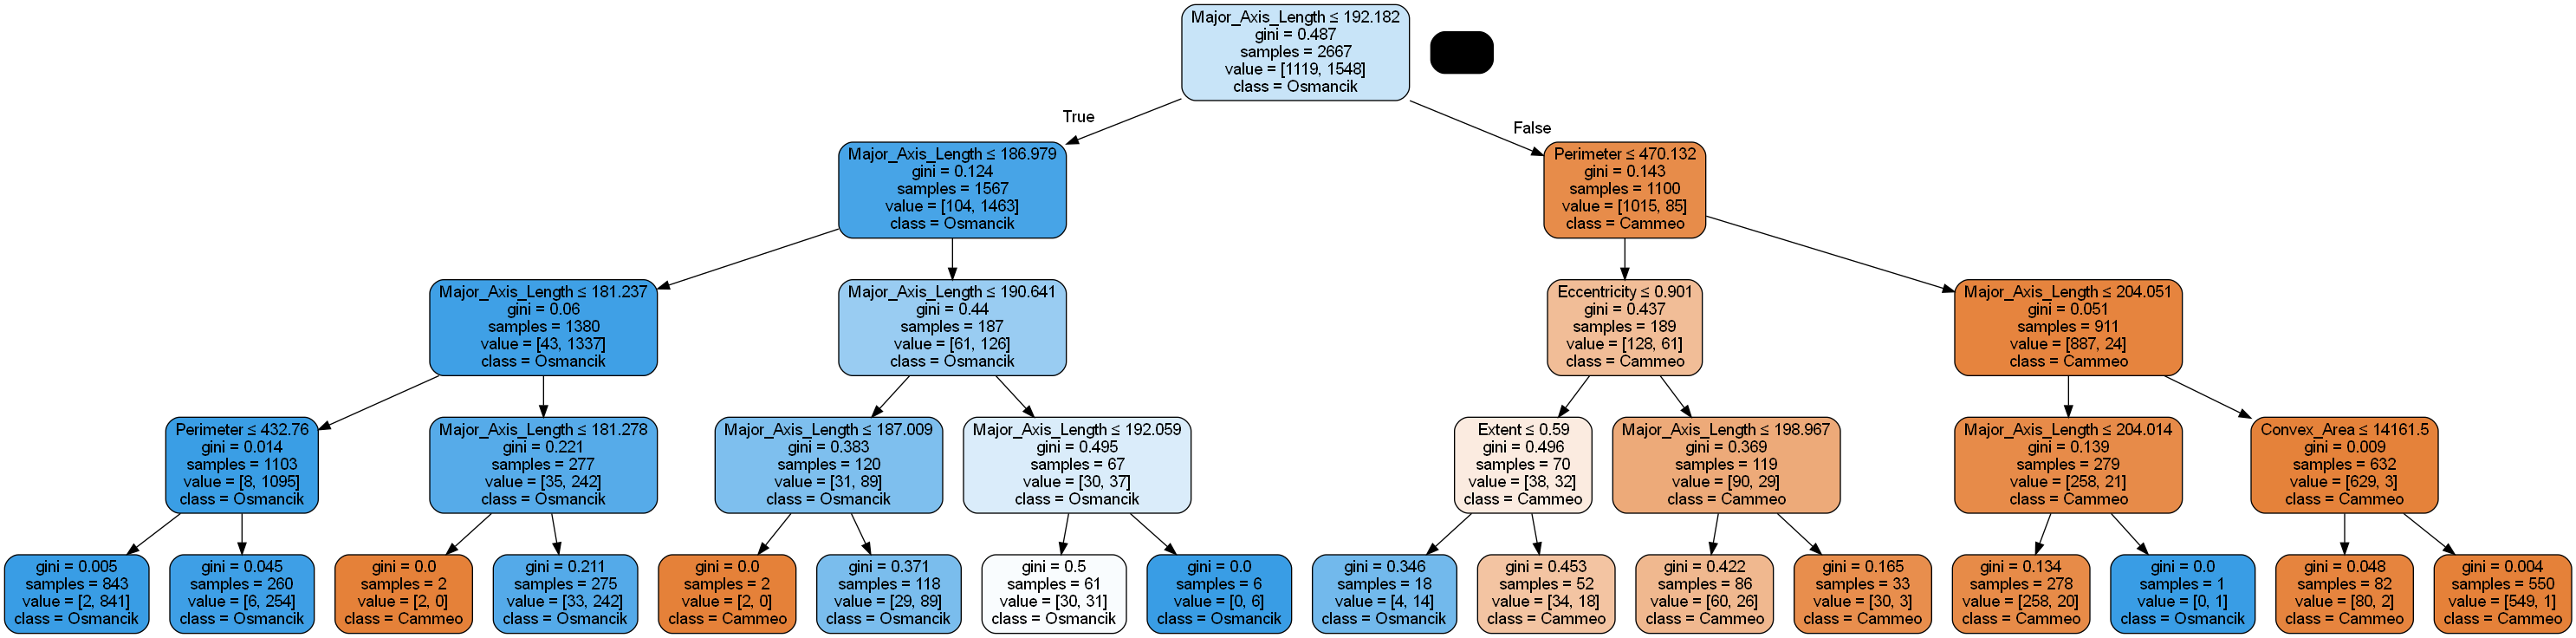

In [32]:
feature_names = list(X.columns)
target_names = list(le.classes_)

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_names, class_names=target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/Rice_decision_tree_graph.png')
Image(graph.create_png())

## Accuracy Value

* print("Training Accuracy: ", model.score(X_train, y_train))
* print("Test Accuracy: ", model.score(X_test, y_test))

### Using cross validation we can see that for depth=2 has the maximum accuracy,but for clear image I chose max_depth=3.